### pandas 基本操作


In [35]:
# 1 导入数据库
import pandas as pd
pd.__version__
import sys
sys.executable

'/Users/wm/anaconda3/bin/python'

In [2]:
# 2 创建Series
arr = [1,2,3,4,5]
df = pd.Series(arr) #如果不指定索引，则默认从 0 开始
df

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
# 3 从字典创建Series  不是df
d = {'a':1,'b':2,'c':3,'d':4,'e':5}
df = pd.Series(d)
df

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [5]:
# 从Numpy 数组创建DataFrame
import numpy as np

dates = pd.date_range('today',periods=6) # 定义时间序列作为 index
num_arr = np.random.randn(6,4) # 传入 numpy 随机数组
num_arr
columns = ['A','B','C','D'] # 将列表作为列名
df = pd.DataFrame(num_arr, index = dates, columns = columns)
df

,A,B,C,D
2021-05-28 11:01:46.117117,-0.685967,-1.335861,-0.254415,-2.672227
2021-05-29 11:01:46.117117,2.478526,-1.130746,-1.976778,0.106129
2021-05-30 11:01:46.117117,0.147527,0.127145,1.972152,1.100032
2021-05-31 11:01:46.117117,-0.504891,0.494860,0.889161,0.575903
2021-06-01 11:01:46.117117,-1.577483,-0.402318,0.413941,1.150724
2021-06-02 11:01:46.117117,0.014062,-1.880337,0.945240,-0.530013


In [6]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
df.info


<bound method DataFrame.info of   animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no>

In [7]:
df.iloc[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [8]:
# 取出其中两列 
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [9]:
2000*19*19

722000

In [11]:
### 取出索引为【3，4，8】行的animal和age列
df.loc[df.index[[3,4,8]],['animal','age']]



,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [12]:
# 取出age大于3的行
df[df['age']>3]
df[df['visits']>1]

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
i,dog,7.0,2,no


In [18]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [19]:
# 13.取出age在2,4间的行（不含）
df[(df['age']>2) & (df['age']<4)]

# 方法二  between函数的使用
df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [20]:
# 14. `f行的age改为1.5
df.loc['f','age'] = 1.6
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.6,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [21]:
# 15. 计算visits的总和
df['visits'].sum()

19

In [22]:
df.head()

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


In [23]:
# 16. 计算每个不同种类animal的age的平均数
a = df.groupby('animal')['age'].mean()
a = pd.DataFrame(a)
a

,age
animal,
cat,2.366667
dog,5.000000
snake,2.500000


In [24]:
# 17. 计算df中每个种类animal的数量
df['animal'].value_counts()


dog      4
cat      4
snake    2
Name: animal, dtype: int64

In [25]:
# 18. 先按age降序排列，后按visits升序排列
df.sort_values(by=['age','visits'],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.6,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [30]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [31]:
# 19. 将priority列中的yes, no替换为布尔值True, False map函数的使用
df['priority'] = df['priority'].map({'no':False,'yes':True})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,2.0,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [29]:
# 20. 将animal列中的snake替换为python
df['animal'] = df['animal'].replace('snake','python')
df

,animal,age,visits,priority
a,cat,2.5,1,NaN
b,cat,3.0,3,NaN
c,python,0.5,2,NaN
d,dog,NaN,3,NaN
e,dog,5.0,2,NaN
f,cat,1.6,3,NaN
g,python,4.5,1,NaN
h,cat,NaN,1,NaN
i,dog,7.0,2,NaN
j,dog,3.0,1,NaN


In [23]:
# 21. 对每种animal的每种不同数量visits，计算平均age，即，返回一个表格，
# 行是aniaml种类，列是visits数量，表格值是行动物种类列访客数量的平均年龄

df = df.fillna(0)
df1 = pd.pivot_table(data=df,index='animal',columns='visits',values='age',aggfunc=np.sum)
df1


visits,1,2,3
animal,,,
cat,2.5,NaN,5.0
dog,3.0,12.0,0.0
snake,4.5,0.5,NaN


In [32]:
# 22. 在df中插入新行k，然后删除该行
df.loc['k'] = [5.5,'dog','no',2]
df = df.drop('k')
df

,animal,age,visits,priority
a,cat,2.5,1,1
b,cat,3,3,1
c,snake,0.5,2,0
d,dog,NaN,3,1
e,dog,5,2,0
f,cat,2,3,0
g,snake,4.5,1,0
h,cat,NaN,1,1
i,dog,7,2,0
j,dog,3,1,0


In [54]:
# 透视表的使用
import os
os.listdir('./')
df = pd.read_csv('./James_Harden.csv')
df.head()   # 前五行
# 练习透视表
df.tail()   # 后5行
#pivot_table(data, values=None, index=None, columns=None,aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
# pivot_table有四个最重要的参数index、values、columns、aggfunc，本文以这四个参数为中心讲解pivot操作是如何进行。
df

# 需求1   想看哈登 对阵每个队伍的得分
pd.pivot_table(df,index='对手')


3分命中率    助攻    命中    得分  投篮命中率   投篮数    篮板
对手  主客场                                             
76人 主    0.4290   7.0   8.0  29.0  0.381  21.0   4.0
    客    0.2500  13.0  10.0  27.0  0.500  20.0   3.0
勇士  客    0.4440  11.0  10.0  27.0  0.435  23.0   6.0
国王  客    0.2860   9.0   8.0  27.0  0.381  21.0   3.0
太阳  客    0.5450   7.0  12.0  48.0  0.545  22.0   2.0
小牛  主    0.4620   7.0  10.0  29.0  0.526  19.0   3.0
尼克斯 主    0.3850  10.0  12.0  37.0  0.444  27.0   2.0
    客    0.3530   9.0   9.0  31.0  0.391  23.0   5.0
开拓者 客    0.5710   3.0  16.0  48.0  0.552  29.0   8.0
掘金  主    0.1430   9.0   6.0  21.0  0.375  16.0   8.0
步行者 主    0.3330  10.0   8.0  29.0  0.364  22.0   8.0
    客    0.2500  15.0   9.0  26.0  0.429  21.0   5.0
湖人  客    0.4440   9.0  13.0  36.0  0.591  22.0   4.0
灰熊  主    0.3395   8.0   9.5  30.0  0.420  22.5   4.5
    客    0.3610   7.5   7.5  24.5  0.383  19.5   4.5
爵士  主    0.8750  13.0  19.0  56.0  0.760  25.0   2.0
    客    0.3330   3.0   8.0  29.0  0.421  19.0   5.0
猛龙  主    0.2730  11.0   8.0  38.0  0.320  25.0   6.0
篮网  主    0.6150   8.0  13.0  37.0  0.650  20.0  10.0
老鹰  客    0.5450  11.0   8.0  29.0  0.533  15.0   3.0
骑士  主    0.4290  13.0   8.0  35.0  0.381  21.0  11.0
鹈鹕  主    0.4000  17.0   8.0  26.0  0.500  16.0   1.0
黄蜂  客    0.4000  11.0   8.0  27.0  0.444  18.0  10.0

In [55]:
# 需求2 对手成为了第一层索引，还想看看对阵同一对手在不同主客场下的数据，试着将对手与胜负与主客场都设置为index
#Index就是层次字段，要通过透视表获取什么信息就按照相应的顺序设置字段，所以在进行pivot之前你也需要足够了解你的数据。
pd.pivot_table(df,index=['对手','主客场'])

3分命中率    助攻    命中    得分  投篮命中率   投篮数    篮板
对手  主客场                                             
76人 主    0.4290   7.0   8.0  29.0  0.381  21.0   4.0
    客    0.2500  13.0  10.0  27.0  0.500  20.0   3.0
勇士  客    0.4440  11.0  10.0  27.0  0.435  23.0   6.0
国王  客    0.2860   9.0   8.0  27.0  0.381  21.0   3.0
太阳  客    0.5450   7.0  12.0  48.0  0.545  22.0   2.0
小牛  主    0.4620   7.0  10.0  29.0  0.526  19.0   3.0
尼克斯 主    0.3850  10.0  12.0  37.0  0.444  27.0   2.0
    客    0.3530   9.0   9.0  31.0  0.391  23.0   5.0
开拓者 客    0.5710   3.0  16.0  48.0  0.552  29.0   8.0
掘金  主    0.1430   9.0   6.0  21.0  0.375  16.0   8.0
步行者 主    0.3330  10.0   8.0  29.0  0.364  22.0   8.0
    客    0.2500  15.0   9.0  26.0  0.429  21.0   5.0
湖人  客    0.4440   9.0  13.0  36.0  0.591  22.0   4.0
灰熊  主    0.3395   8.0   9.5  30.0  0.420  22.5   4.5
    客    0.3610   7.5   7.5  24.5  0.383  19.5   4.5
爵士  主    0.8750  13.0  19.0  56.0  0.760  25.0   2.0
    客    0.3330   3.0   8.0  29.0  0.421  19.0   5.0
猛龙  主    0.2730  11.0   8.0  38.0  0.320  25.0   6.0
篮网  主    0.6150   8.0  13.0  37.0  0.650  20.0  10.0
老鹰  客    0.5450  11.0   8.0  29.0  0.533  15.0   3.0
骑士  主    0.4290  13.0   8.0  35.0  0.381  21.0  11.0
鹈鹕  主    0.4000  17.0   8.0  26.0  0.500  16.0   1.0
黄蜂  客    0.4000  11.0   8.0  27.0  0.444  18.0  10.0

In [59]:
#通过上面的操作，我们获取了james harden在对阵对手时的所有数据，而Values可以对需要的计算数据进行筛选，
# 如果我们只需要james harden在主客场和不同胜负情况下的得分、篮板与助攻三项数据：
df
pd.pivot_table(df,index=['主客场','胜负'],values=['篮板','助攻','得分'])


助攻         得分        篮板
主客场 胜负                                
主   胜   10.555556  34.222222  5.444444
    负    8.666667  29.666667  5.000000
客   胜    9.000000  32.000000  4.916667
    负    8.000000  20.000000  4.000000

In [63]:
# aggfunc  参数可以设置我们对数据聚合时进行的函数操作。
# 当我们未设置aggfunc时，它默认aggfunc='mean'计算均值。
# 我们还想要获得james harden在主客场和不同胜负情况下的总得分、总篮板、总助攻时：
import numpy as np
pd.pivot_table(df,index=['主客场','胜负'],values=['得分','助攻','篮板'],aggfunc=[np.sum,np.mean,np.max])


sum                mean                      amax        
         助攻   得分  篮板         助攻         得分        篮板   助攻  得分  篮板
主客场 胜负                                                           
主   胜    95  308  49  10.555556  34.222222  5.444444   17  56  11
    负    26   89  15   8.666667  29.666667  5.000000   11  38   6
客   胜   108  384  59   9.000000  32.000000  4.916667   15  48  10
    负     8   20   4   8.000000  20.000000  4.000000    8  20   4

In [67]:
# columns
#Columns类似Index可以设置列层次字段，它不是一个必要参数，作为一种分割数据的可选方式。
#fill_value填充空值,margins=True进行汇总
pd.pivot_table(df,index=['主客场'],columns=['对手'],values=['得分'],aggfunc=[np.sum],fill_value=0,margins=1)



mean                                                                     \
      得分                                                                      
对手   76人  勇士  国王  太阳  小牛 尼克斯 开拓者  掘金   步行者  湖人     灰熊    爵士  猛龙  篮网  老鹰  骑士   
主客场                                                                           
主     29   0   0   0  29  37   0  21  29.0   0  30.00  56.0  38  37   0  35   
客     27  27  27  48   0  31  48   0  26.0  36  24.50  29.0   0   0  29   0   
All   28  27  27  48  29  34  48  21  27.5  36  27.25  42.5  38  37  29  35   

                        
                        
对手   鹈鹕  黄蜂        All  
主客场                     
主    26   0  33.083333  
客     0  27  31.076923  
All  26  27  32.040000

In [69]:
# 不同columns
table=pd.pivot_table(df,index=[u'对手',u'胜负'],columns=[u'主客场'],values=[u'得分',u'助攻',u'篮板'],aggfunc=[np.mean],fill_value=0)
table
table.query('对手 == ["灰熊"]')

mean                    
         助攻      得分      篮板    
主客场       主   客   主   客   主   客
对手  胜负                         
76人 胜     0  13   0  27   0   3
    负     7   0  29   0   4   0
勇士  胜     0  11   0  27   0   6
国王  胜     0   9   0  27   0   3
太阳  胜     0   7   0  48   0   2
小牛  胜     7   0  29   0   3   0
尼克斯 胜    10   9  37  31   2   5
开拓者 胜     0   3   0  48   0   8
掘金  胜     9   0  21   0   8   0
步行者 胜    10  15  29  26   8   5
湖人  胜     0   9   0  36   0   4
灰熊  胜     8   7  38  29   4   5
    负     8   8  22  20   5   4
爵士  胜    13   3  56  29   2   5
猛龙  负    11   0  38   0   6   0
篮网  胜     8   0  37   0  10   0
老鹰  胜     0  11   0  29   0   3
骑士  胜    13   0  35   0  11   0
鹈鹕  胜    17   0  26   0   1   0
黄蜂  胜     0  11   0  27   0  10

In [76]:
# 统计哈登不同主客场与胜负下的场数以及投篮命中率（哈登在主场且胜利的场数以及在这种情况下的投篮命中率）
df1 = df[df['胜负']=='胜']
df1
pd.pivot_table(df,index=['主客场'],columns=['胜负','对手'],values=['投篮命中率'],aggfunc=[np.sum],fill_value=0)

sum                                                                 \
    投篮命中率                                                                  
胜负      胜                                                                  
对手    76人     勇士     国王     太阳     小牛    尼克斯    开拓者     掘金    步行者     湖人   
主客场                                                                        
主     0.0  0.000  0.000  0.000  0.526  0.444  0.000  0.375  0.364  0.000   
客     0.5  0.435  0.381  0.545  0.000  0.391  0.552  0.000  0.429  0.591   

                                                                      
                                                                      
胜负                                                    负               
对手     灰熊     爵士    篮网     老鹰     骑士   鹈鹕     黄蜂    76人     灰熊    猛龙  
主客场                                                                   
主    0.44  0.760  0.65  0.000  0.381  0.5  0.000  0.381  0.400  0.32  
客    0.45  0.421  0.00  0.533  0.000  0.0  0.444  0.000  0.316  0.00

In [86]:
# 23. 有一列整数列A的DatraFrame，删除数值重复的行
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df
# df1 =df.drop_duplicates(subset='A')
df1 = df.loc[df['A'].shift() != df['A']]
df1
df.drop_duplicates(subset='A')

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [27]:
import pandas as pd
import numpy as np
# 24. 一个全数值DatraFrame，每个数字减去该行的平均数  sub用法

df = pd.DataFrame(np.random.randint(low=1,high=10,size=(5, 3)))
print(df)
print(df.mean(axis=0))  # axis=0 为按照列求均值
print(df.mean(axis=1))  # axis=1 为按照行求均值
df1 = df.sub(df.mean(axis=1),axis=0)  #  axis=1 按照行取均值，然后按照列去减
df1

print(df1)

# importing pandas as pd 
import pandas as pd 
# Creating the dataframe  
df_2 = pd.DataFrame({"A":[1, 5, 3, 4, 2], 
                   "B":[3, 2, 4, 3, 4],  
                   "C":[2, 2, 7, 3, 4],  
                   "D":[4, 3, 6, 12, 7]},  
                   index =["A1", "A2", "A3", "A4", "A5"]) 


print('df_2',df_2)
sr = pd.Series([12, 25, 64, 18], index =["A", "B", "C", "D"])
df_sub = df_2.sub(sr, axis = 1)    
df_sub


   0  1  2
0  2  3  1
1  5  8  9
2  6  8  7
3  1  4  2
4  3  9  5
0    3.4
1    6.4
2    4.8
dtype: float64
0    2.000000
1    7.333333
2    7.000000
3    2.333333
4    5.666667
dtype: float64
df_2     A  B  C   D
A1  1  3  2   4
A2  5  2  2   3
A3  3  4  7   6
A4  4  3  3  12
A5  2  4  4   7


,A,B,C,D
A1,-11,-22,-62,-14
A2,-7,-23,-62,-15
A3,-9,-21,-57,-12
A4,-8,-22,-61,-6
A5,-10,-21,-60,-11


In [18]:
# 25. 一个有5列的DataFrame，求哪一列的和最小
import pandas as pd
import numpy as np
df1 = pd.DataFrame(np.random.randint(low=0,high=10,size=(5,4)),columns=list('abcd'))
df1['index'] = list('一二三四五')
df1 = df1.set_index('index',drop=True)
df1
df1.sum(axis=0).idxmin()  # 找出一列和最小
df1.sum(axis=1).idxmin()  # 找出哪一行和最小


'三'

In [63]:
# 26. 给定DataFrame，求代号列不同分组数据中  ‘数值’数值最大的三个值的和 
df = pd.DataFrame({'代号': list('aaabbcaabcccbbc'), 
                   '数值': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

# 方法1
df1 = df.groupby('代号')['数值'].nlargest(3).sum(level=0)   # 主要是groupby的用法
print('方法1',df1)

# 方法2
def nlargest_sum(data,n):
    data = data.sort_values(ascending=False)
    return data[:n].sum()

df_nlagest = df.groupby('代号')['数值'].apply(lambda x : nlargest_sum(x,n=3))
print('方法2',df_nlagest)


方法1 代号
a    409
b    156
c    345
Name: 数值, dtype: int64
方法2 代号
a    409
b    156
c    345
Name: 数值, dtype: int64


In [64]:
# 27. 给定DataFrame，有列A, B，A的值在1-100（含），对A列数值 10步长，求对应的B的值和
# 练习 pd.cut()函数
df = pd.DataFrame({'A': [1,2,11,11,33,34,35,40,79,99], 
                   'B': [1,2,11,11,33,34,35,40,79,99]})
cut_data = pd.cut(df['A'],bins=np.arange(0,101,10))
bins = np.arange(0,101,10)          # np用法
df.groupby(cut_data)['B'].sum()     # 这个用法并不熟悉


A
(0, 10]        3
(10, 20]      22
(20, 30]       0
(30, 40]     142
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]      79
(80, 90]       0
(90, 100]     99
Name: B, dtype: int64

In [78]:
# np.r_ 按照行   np.c_是按照列进行矩阵的拼接
import numpy as np
x = np.arange(9).reshape(3, 3)
y = np.ones([3, 3])
c = np.r_[x, y]
d = np.c_[x, y]

array([[0., 1., 2., 1., 1., 1.],
       [3., 4., 5., 1., 1., 1.],
       [6., 7., 8., 1., 1., 1.]])

In [ ]:
np.searchsorted

In [90]:
import numpy as np
import pandas as pd

# 28. 给定DataFrame，计算每个元素至左边0的距离  生成新列y 
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
# 左边 0 的位置，然后所有的数据的位置 
first_zero_index = df.loc[df['X']==0].index[0]
index_all = np.arange(0,df.shape[0],1)
df['Y'] = abs(index_all - first_zero_index)  
# print(df)

# 28_a. 给定DataFrame，计算每个元素至左边最近的0 如果左边没有0那就是到开头的距离的距离，生成新列y 
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
izero = np.r_[-1, (df['X'] == 0).to_numpy().nonzero()[0]] # 标记0的位置
print('izero',izero)
idx = np.arange(len(df))
print(idx)


df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
print(df)

izero [-1  2  7]
[0 1 2 3 4 5 6 7 8 9]
   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


In [36]:
# 29 一个全部是数值的DatafRAME 返回最大3个值的坐标
import pandas as pd
import numpy as np 
df = pd.DataFrame(np.random.randint(low=0,high=100,size=(5,5)))
print(df)
df.unstack().sort_values()[-3:].index.tolist()   # df.unstack

    0   1   2   3   4
0   0   9  44  15  32
1   3   6  97  85  26
2  67  76  93  59  50
3  75  88  71  43  85
4  62  29  64  78  31


[(1, 3), (2, 2), (2, 1)]

In [71]:
# 30. 给定DataFrame，将负值代替为同组非 负值的平均值  同组指的是同一列？
# df = pd.DataFrame(np.random.randint(low=-10,high=10,size=(4,4)))
# print(df)
# df_mean = df.mean(axis=0)
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [-12,345,3,1,45,14,4,-52,54,23,-235,21,57,3,87]})
def repalce(group):
    print(type(group))
    mask = group < 0
    group[mask] = group[~mask].mean()
    return group

# df['vals'] = df.groupby(['grps'])['vals'].transform(repalce)  # transform
group = df['vals']
mask = df['vals'] < 0 
group[~mask].mean()
group[mask]
# mask 的使用 主要是对一些  范围值得定位非常方便

0     -12
7     -52
10   -235
Name: vals, dtype: int64

In [82]:
# 31 计算3位滑动窗口，分组计算并且忽略nan值 原始的答案有点乱 没看懂题目不够明确

df = pd.DataFrame({'group': list('aabbabbbabab'),
                    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value'] 
s= g2.rolling(3,min_periods=1).sum() /g1.rolling(3, min_periods=1).count()
s.reset_index(level=0, drop=True).sort_index()


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

In [3]:
# 32. 创建Series s，将2015所有工作日作为随机值的索引
import numpy as np
df = np.random.randint(low=1,high=366,size=(365,))
df_date = pd.date_range(start='2015-01',periods=df.shape[0])
s = pd.Series(df,index=df_date)
s

2015-01-01     26
2015-01-02    258
2015-01-03     19
2015-01-04    173
2015-01-05    269
             ... 
2015-12-27     15
2015-12-28    220
2015-12-29    216
2015-12-30     54
2015-12-31    166
Freq: D, Length: 365, dtype: int32

In [6]:
# 33 所有周三  或者周五的值求和或者求均值
s = pd.DataFrame(s)
s[s.index.weekday==2].sum


<bound method DataFrame.sum of               0
2015-01-07   82
2015-01-14  245
2015-01-21   47
2015-01-28  133
2015-02-04  288
2015-02-11   90
2015-02-18  138
2015-02-25  157
2015-03-04  327
2015-03-11  342
2015-03-18  302
2015-03-25  337
2015-04-01  229
2015-04-08   95
2015-04-15   27
2015-04-22  274
2015-04-29  311
2015-05-06  209
2015-05-13  101
2015-05-20  274
2015-05-27  250
2015-06-03  189
2015-06-10  321
2015-06-17  114
2015-06-24   48
2015-07-01   14
2015-07-08  276
2015-07-15   31
2015-07-22  257
2015-07-29  335
2015-08-05   27
2015-08-12  178
2015-08-19  181
2015-08-26  332
2015-09-02  255
2015-09-09  137
2015-09-16  202
2015-09-23   64
2015-09-30   13
2015-10-07  138
2015-10-14  235
2015-10-21  131
2015-10-28  338
2015-11-04  174
2015-11-11   19
2015-11-18   47
2015-11-25  248
2015-12-02  357
2015-12-09   51
2015-12-16   84
2015-12-23  138
2015-12-30   54>

In [7]:
### 每个自然月求和  每个季度
a = s.resample('M').mean()
s.resample('3M').mean()


,0
2015-01-31,183.774194
2015-04-30,199.179775
2015-07-31,165.423913
2015-10-31,185.586957
2016-01-31,173.737705


In [8]:
# 35. 每连续4个月为一组，求最大值所在的日期
s.groupby(pd.Grouper(freq='4M')).idxmax()

,0
2015-01-31,2015-01-23
2015-05-31,2015-04-13
2015-09-30,2015-09-19
2016-01-31,2015-11-12


In [9]:
# 36. 创建2015-2016每月第三个星期四的序列 date_range很强大

pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [36]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [37]:
# 37. FlightNumber列中有些值缺失了，他们本来应该是每一行增加10，填充缺失的数值，并且令数据类型为整数
# 插入数据的地方必须为Nan，然后这是线性插值得方式  用的时候去官网看看参数会有更速掌握 
import copy 
df1 = copy.deepcopy(df)
df2 = copy.deepcopy(df)
df1['FlightNumber'] = df1['FlightNumber'].interpolate(method='pad').astype('int')
print(df1)
df2['FlightNumber'] = df2['FlightNumber'].interpolate(method='linear').astype('int')
df2

            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10045            []    <Air France> (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10065          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air"


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [38]:
# 38. 将From_To列从_分开，分成From, To两列，并删除原始列
df2['From'] = df2['From_To'].apply(lambda x: x.split('_')[0])
df2['To'] = df2['From_To'].apply(lambda x: x.split('_')[1])
df2
a= df1.From_To.str.split("_",expand=True)
df1.join(a)


,From_To,FlightNumber,RecentDelays,Airline,0,1
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10045,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10065,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


In [39]:
# 39. 将From, To大小写统一首字母大写其余小写
df2['To'] = df2['To'].str.capitalize()
df2
df2['From'] = df2['From'].str.capitalize()

df2

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,10055,[],<Air France> (12),Madrid,Milan
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [40]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [41]:
# 40. Airline列，有一些多余的标点符号，需要提取出正确的航司名称。举例：'(British Airways. )' 应该改为 'British Airways'.
df3 = copy.deepcopy(df2)
# df2['Airline'] = df2['Airline'].str.extract('([a_zA_Z\s]+)',expand=False).str.strip() 横杠的写法
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM
1,MAdrid_miLAN,NaN,[],Air France
2,londON_StockhOlm,10065.0,"[24, 43, 87]",British Airways
3,Budapest_PaRis,NaN,[13],Air France
4,Brussels_londOn,10085.0,"[67, 32]",Swiss Air


In [52]:
# 41. Airline列，数据被以列表的形式录入，但是我们希望每个数字被录入成单独一列，delay_1, delay_2, ...没有的用NAN替代。
df_recentdelays = df1['RecentDelays'].apply(pd.Series)  # apply函数
# 给df进行列重命名
df_recentdelays.columns = ['delay_{}'.format(n) for n in range(df_recentdelays.columns.shape[0])]
df_recentdelays


,delay_0,delay_1,delay_2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [69]:
# 42. 用 letters = ['A', 'B', 'C']和 numbers = list(range(10))的组合作为系列随机值的层次化索引
num = np.random.randint(low=0,high=100,size=(12))

letters = ['A', 'B', 'C']
numbers = list(range(4))
numbers
letters = ['a','b','c']
letters
mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(num,index=mi)
s

a  0    67
   1    53
   2    92
   3    33
b  0    91
   1    93
   2    76
   3    96
c  0     8
   1    30
   2    53
   3    24
dtype: int64

In [71]:
# 43. 检查s是否是字典顺序排序的
s.index.is_lexsorted


<bound method MultiIndex.is_lexsorted of MultiIndex([('a', 0),
            ('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 0),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 0),
            ('c', 1),
            ('c', 2),
            ('c', 3)],
           )>

In [74]:
s

a  0    67
   1    53
   2    92
   3    33
b  0    91
   1    93
   2    76
   3    96
c  0     8
   1    30
   2    53
   3    24
dtype: int64

In [73]:
# 44 选择二级索引为1、3的行
s.loc[:,[1,3]]

a  1    53
   3    33
b  1    93
   3    96
c  1    30
   3    24
dtype: int64

In [105]:
# 45. 对s进行切片操作，取一级索引至B，二级索引从2开始到最后45. 对s进行切片操作，取一级索引至B，二级索引从2开始到最后
print(type(s))
# 方法1
s.loc['a':'b',2:]
#方法二
s.loc[pd.IndexSlice[:'b', 2:]]
# 方法三
s.loc[slice(None, 'b'), slice(2, None)]

<class 'pandas.core.series.Series'>


a  2    92
   3    33
b  2    76
   3    96
dtype: int64

In [107]:
s

a  0    67
   1    53
   2    92
   3    33
b  0    91
   1    93
   2    76
   3    96
c  0     8
   1    30
   2    53
   3    24
dtype: int64

In [118]:
# 46. 计算每个一级索引的和（A, B, C每一个的和）
s.sum(level=0)
#方法二
s1 = s.unstack()  # 将二级索引 转为正常的索引
print(s1.sum(axis=1))
print(s1.values.sum())


a    245
b    356
c    115
dtype: int64
716


In [127]:
# 47. 交换索引等级，新的Series是字典顺序吗？不是的话请排序
new_s = s.swaplevel(0,1)
new_s
print(new_s.index.is_lexsorted)
news = new_s.sort_index()
news

<bound method MultiIndex.is_lexsorted of MultiIndex([(0, 'a'),
            (1, 'a'),
            (2, 'a'),
            (3, 'a'),
            (0, 'b'),
            (1, 'b'),
            (2, 'b'),
            (3, 'b'),
            (0, 'c'),
            (1, 'c'),
            (2, 'c'),
            (3, 'c')],
           )>


0  a    67
   b    91
   c     8
1  a    53
   b    93
   c    30
2  a    92
   b    76
   c    53
3  a    33
   b    96
   c    24
dtype: int64

## 可视化

In [136]:
import matplotlib 
from matplotlib import pyplot
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
# plt.style.use('ggplot')   # 第一次这么用,plt.style


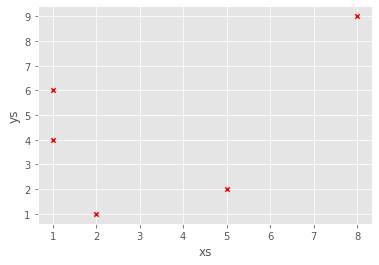

In [138]:
#散点图。
df.plot.scatter(x='xs',y='ys',marker='x',color='r')

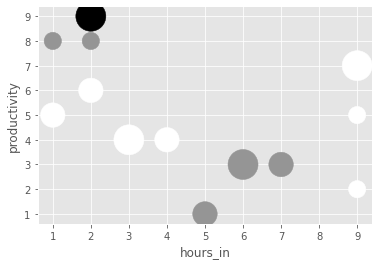

In [146]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,2]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 300, c = df.caffienated) # s是size  c 是color




,revenue,advertising,month
0,57,2.1,0
1,68,1.9,1
2,63,2.7,2
3,71,3.0,3
4,72,3.6,4
5,90,3.2,5
6,80,2.7,6
7,62,2.4,7
8,59,1.8,8
9,51,1.6,9


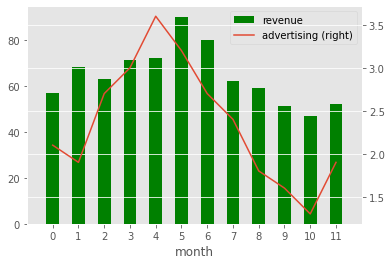

In [148]:
# 50. 在同一个图中可视化2组数据，共用X轴，但y轴不同   pl. pl. pl 
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)})

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12));
df


In [ ]:
# 该项目是在知乎当中学习的一个小练习，主要是巩固pd的一些基本操作  20210620，今天是父亲节，祝自己的父亲节日快乐，身体健康！！！！
